# Music Genre Classification Analysis

This notebook provides comprehensive analysis and visualization of the music genre classification results using GTZAN dataset.

## Overview
- **Dataset**: GTZAN Music Genre Classification
- **Models**: Random Forest, SVM, CNN
- **Features**: 30-second audio features + Spectrogram images
- **Genres**: 10 music genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock)


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Model Results and Data


In [2]:
# Load trained models and preprocessing artifacts
models_dir = Path("../models")
results_dir = Path("../results")

# Load models
try:
    random_forest = joblib.load(models_dir / "random_forest_model.pkl")
    svm = joblib.load(models_dir / "svm_model.pkl")
    scaler = joblib.load(models_dir / "scaler.pkl")
    label_encoder = joblib.load(models_dir / "label_encoder.pkl")
    print("✓ Models loaded successfully")
except Exception as e:
    print(f"Error loading models: {e}")

# Load test data
try:
    X_test = joblib.load(models_dir / "X_test.pkl")
    y_test = joblib.load(models_dir / "y_test.pkl")
    print(f"✓ Test data loaded: {X_test.shape[0]} samples, {X_test.shape[1]} features")
except Exception as e:
    print(f"Error loading test data: {e}")

# Create results directory if it doesn't exist
results_dir.mkdir(exist_ok=True)
print(f"✓ Results directory: {results_dir.absolute()}")


✓ Models loaded successfully
✓ Test data loaded: 200 samples, 57 features
✓ Results directory: C:\Users\diyap\Downloads\10_ MusicGenreClassification\notebooks\..\results


## 2. Model Performance Analysis


In [3]:
# Make predictions on test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Get predictions from both models
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Get genre names
genre_names = label_encoder.classes_
print(f"\nGenres: {list(genre_names)}")


Random Forest Accuracy: 0.6950
SVM Accuracy: 0.7100

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


## 3. Confusion Matrices Visualization


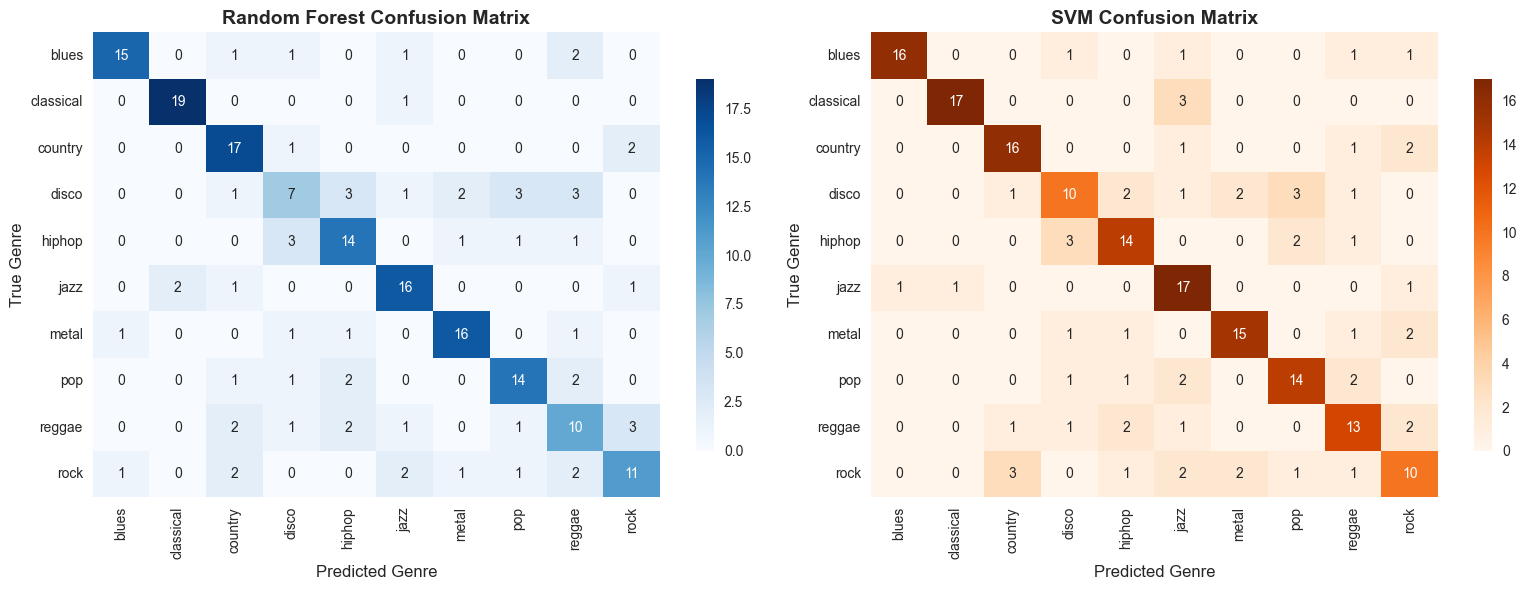

✓ Confusion matrices saved to results/confusion_matrices.png


In [4]:
# Create confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

# Create subplot for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=genre_names, yticklabels=genre_names,
            ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Genre', fontsize=12)
axes[0].set_ylabel('True Genre', fontsize=12)

# SVM Confusion Matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=genre_names, yticklabels=genre_names,
            ax=axes[1], cbar_kws={'shrink': 0.8})
axes[1].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Genre', fontsize=12)
axes[1].set_ylabel('True Genre', fontsize=12)

plt.tight_layout()
plt.savefig(results_dir / 'confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices saved to results/confusion_matrices.png")


## 4. Model Accuracy Comparison


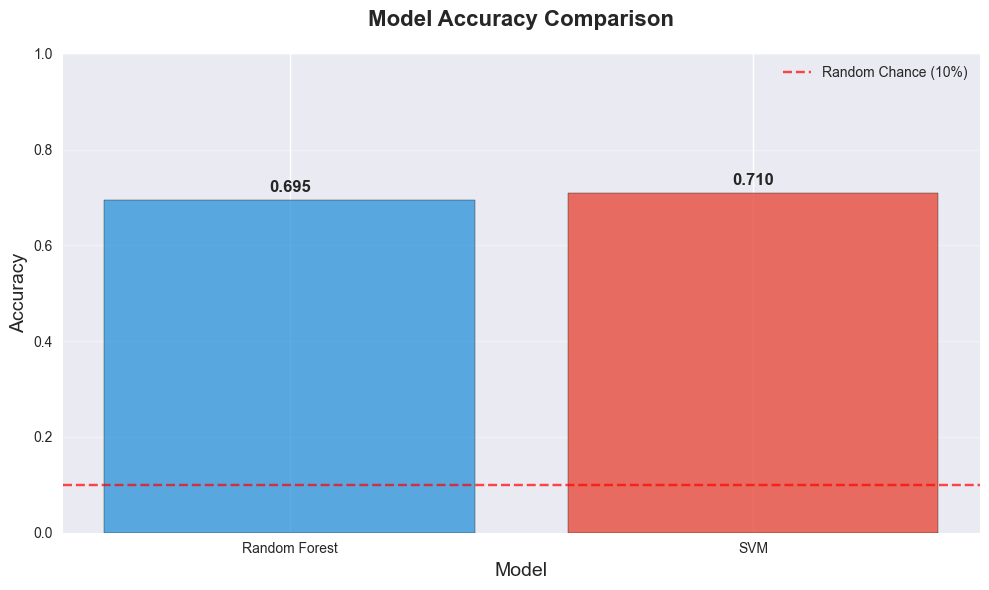

✓ Model accuracy comparison saved to results/model_accuracy_comparison.png


In [5]:
# Create accuracy comparison plot
models = ['Random Forest', 'SVM']
accuracies = [rf_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)

# Add horizontal line at 0.1 (random chance for 10 classes)
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Random Chance (10%)')
plt.legend()

plt.tight_layout()
plt.savefig(results_dir / 'model_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Model accuracy comparison saved to results/model_accuracy_comparison.png")


## 5. Spectrogram Visualization


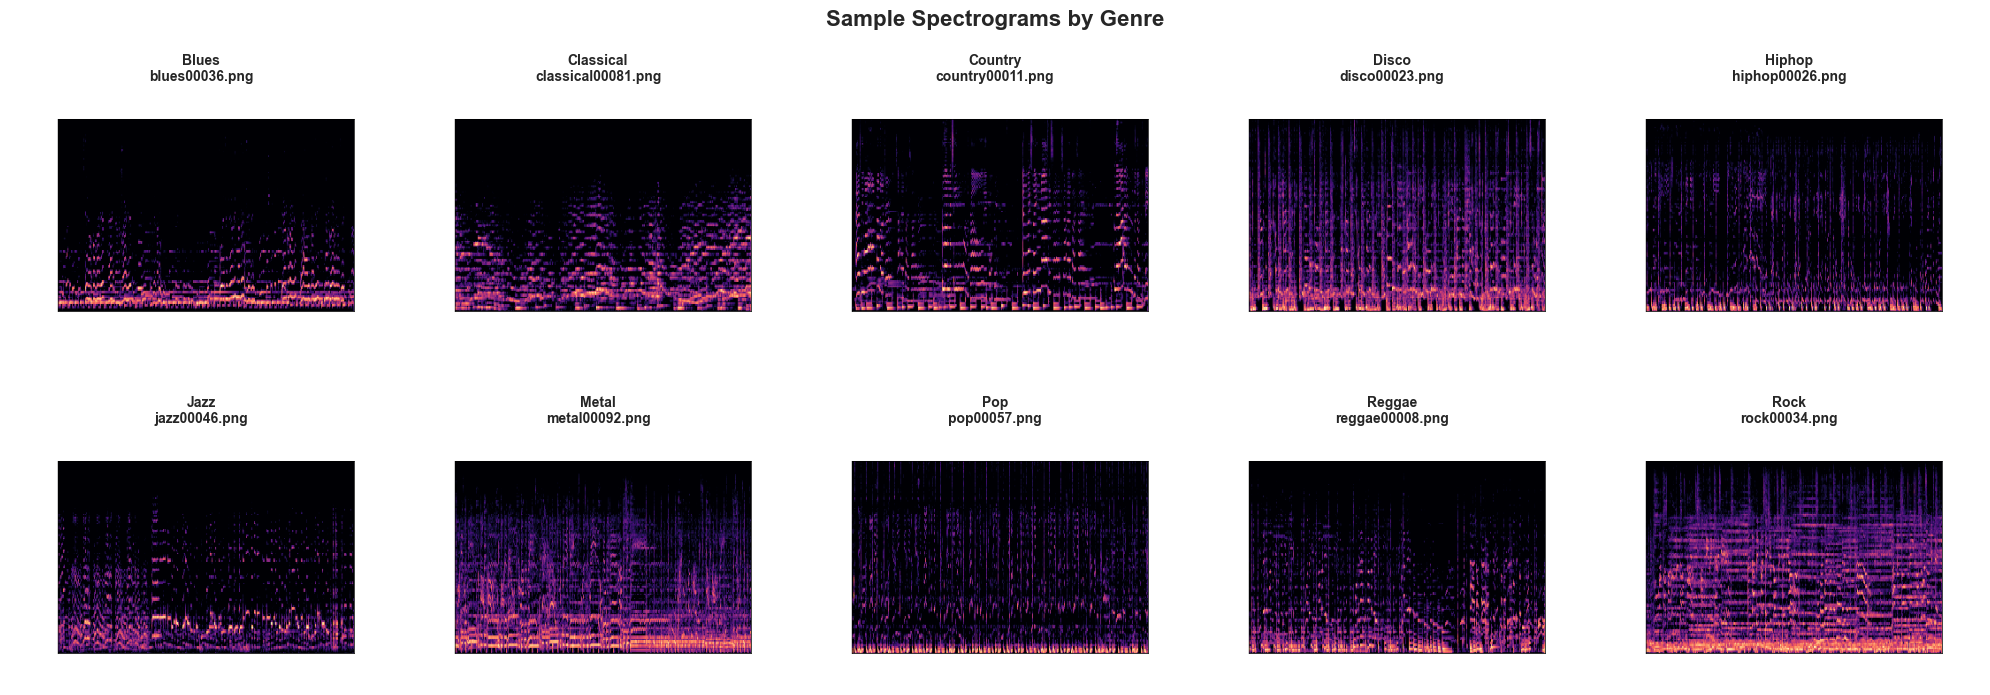

✓ Sample spectrograms saved to results/sample_spectrograms.png


In [6]:
# Load and display sample spectrograms
from PIL import Image
import random

# Path to spectrogram images
images_dir = Path("../Data/images_original")

if images_dir.exists():
    # Create a grid of sample spectrograms
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    
    for i, genre in enumerate(genre_names):
        genre_dir = images_dir / genre
        if genre_dir.exists():
            # Get a random image from this genre
            image_files = list(genre_dir.glob("*.png"))
            if image_files:
                random_image = random.choice(image_files)
                
                # Load and display image
                img = Image.open(random_image)
                axes[i].imshow(img, cmap='viridis')
                axes[i].set_title(f'{genre.title()}\n{random_image.name}', fontsize=10, fontweight='bold')
                axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f'No images\nfor {genre}', ha='center', va='center', 
                           transform=axes[i].transAxes, fontsize=10)
                axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f'No directory\nfor {genre}', ha='center', va='center', 
                       transform=axes[i].transAxes, fontsize=10)
            axes[i].axis('off')
    
    plt.suptitle('Sample Spectrograms by Genre', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.savefig(results_dir / 'sample_spectrograms.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Sample spectrograms saved to results/sample_spectrograms.png")
else:
    print("⚠ Spectrogram images directory not found: ../Data/images_original")


## 6. Performance Summary Report


In [7]:
# Create comprehensive performance summary
rf_report = classification_report(y_test, rf_predictions, target_names=genre_names, output_dict=True)
svm_report = classification_report(y_test, svm_predictions, target_names=genre_names, output_dict=True)

summary_data = {
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [rf_accuracy, svm_accuracy],
    'Macro F1-Score': [rf_report['macro avg']['f1-score'], svm_report['macro avg']['f1-score']],
    'Weighted F1-Score': [rf_report['weighted avg']['f1-score'], svm_report['weighted avg']['f1-score']]
}

summary_df = pd.DataFrame(summary_data)

# Display summary table
print("="*60)
print("MUSIC GENRE CLASSIFICATION PERFORMANCE SUMMARY")
print("="*60)
print(f"\nDataset: GTZAN Music Genre Classification")
print(f"Total Test Samples: {len(y_test)}")
print(f"Number of Genres: {len(genre_names)}")
print(f"Feature Dimensions: {X_test.shape[1]}")

print("\n" + "-"*60)
print("MODEL PERFORMANCE COMPARISON")
print("-"*60)
print(summary_df.to_string(index=False, float_format='%.4f'))

# Save summary to CSV
summary_df.to_csv(results_dir / 'model_performance_summary.csv', index=False)
print(f"\n✓ Performance summary saved to results/model_performance_summary.csv")

# Best performing model
best_model = 'Random Forest' if rf_accuracy > svm_accuracy else 'SVM'
best_accuracy = max(rf_accuracy, svm_accuracy)
print(f"\n🏆 Best Performing Model: {best_model} (Accuracy: {best_accuracy:.4f})")

print("\n" + "="*60)


MUSIC GENRE CLASSIFICATION PERFORMANCE SUMMARY

Dataset: GTZAN Music Genre Classification
Total Test Samples: 200
Number of Genres: 10
Feature Dimensions: 57

------------------------------------------------------------
MODEL PERFORMANCE COMPARISON
------------------------------------------------------------
        Model  Accuracy  Macro F1-Score  Weighted F1-Score
Random Forest    0.6950          0.6904             0.6904
          SVM    0.7100          0.7102             0.7102

✓ Performance summary saved to results/model_performance_summary.csv

🏆 Best Performing Model: SVM (Accuracy: 0.7100)

